# Описание проекта

**Аннотация**

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.




# 1. Загрузка и подготовка данных

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Регион 0

In [176]:
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [177]:
geo_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [178]:
geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [179]:
geo_0.nunique()

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

В первом регионе на нескольких объектах (10), скорее всего, были произведены повторные замеры, что должно уточнить наши данные.

## Регион 1

In [180]:
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [114]:
geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [115]:
geo_1.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

Оценочные значения объемов продукта в данном регионе не уникальны - всего 12. Это выглядит подозрительно, однако возможно просто методология расчета аппроксимировала значения по классам и приближала их к среднему в классе 

## Регион 2

In [207]:
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

geo_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [117]:
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [118]:
geo_2.nunique()

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
данные на базе)

На 4 скважинах в данном регионе были произведены повторные замеры

### Выведем общую статистику по регионам

In [119]:
geo_0.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [120]:
geo_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [121]:
geo_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Выводы по этапу:

- Данные успешно загружены и соотносимы между собой

- Пропуски отсутствуют, полных дубликатов также не обнаружено (как минимум 3 столбца - уникальны)

- Некоторые id повторяются, однако это не является проблемой, так как они предоставляют нам дополнительные сведения для моделей, хоть и взяты с одного источника. Более того, он не понадобится нам в дальнейшем.

- Статистика информативна только по продукту: самое маленькое среднее в выборках - в регионе с индексом 1.

# 2. Обучение и проверка модели

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [123]:
def grid_search(model, param_grid, cv, x, y):
        grid_model = GridSearchCV(model, param_grid=param_grid, cv=cv, verbose=1, n_jobs=-1)
        grid_model.fit(x, y)
        best_estimator = grid_model.best_estimator_
        return best_estimator

In [124]:
def visualize(data,title,x ='product', y ='predicted'):
    plt.figure(figsize=(15,10))
    ax = sns.regplot(x ='product',y = 'predicted', x_bins=100, data = data).set_title(title)

In [125]:
def visualize_dist(data1, data2, title, bins=100):
    _,ax = plt.subplots(figsize=(10,10))
    
    ax.hist(data1, bins = bins, color = 'red', alpha = 0.65, label = 'real')
    ax.hist(data2, bins = bins, color = 'blue', alpha = 0.65, label = 'data2_name')
        
    ax.axvline(data1.mean(),linestyle = '--', color = 'lime', label = 'Real')
                
    ax.axvline(data2.mean(),linestyle = '--', color = 'coral', label = 'Predicted')
                
    #ax.set_ylabel(y_label)
    #ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc='best')

In [126]:
param_grid = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}

In [127]:
scores = []

In [128]:
lin = LinearRegression()

### Регион 1

In [129]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(\
                                geo_0.iloc[:,1:-1], geo_0['product'], test_size=0.25, random_state=42)

In [130]:
X_train_1.shape, y_train_1.shape

((75000, 3), (75000,))

In [131]:
lin_1 = grid_search(lin, param_grid, 4, X_train_1, y_train_1)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    3.1s finished


In [132]:
y_predict_1 = lin_1.predict(X_test_1)

In [133]:
region_1_report = pd.DataFrame(y_test_1)
region_1_report['predicted'] = y_predict_1

In [134]:
region_1_report.sort_values('predicted', ascending=False).head()

,product,predicted
46784,153.639837,176.536104
27658,140.631646,176.274510
6496,178.879516,173.249504
65743,176.807828,172.802708
93716,130.985681,172.744977


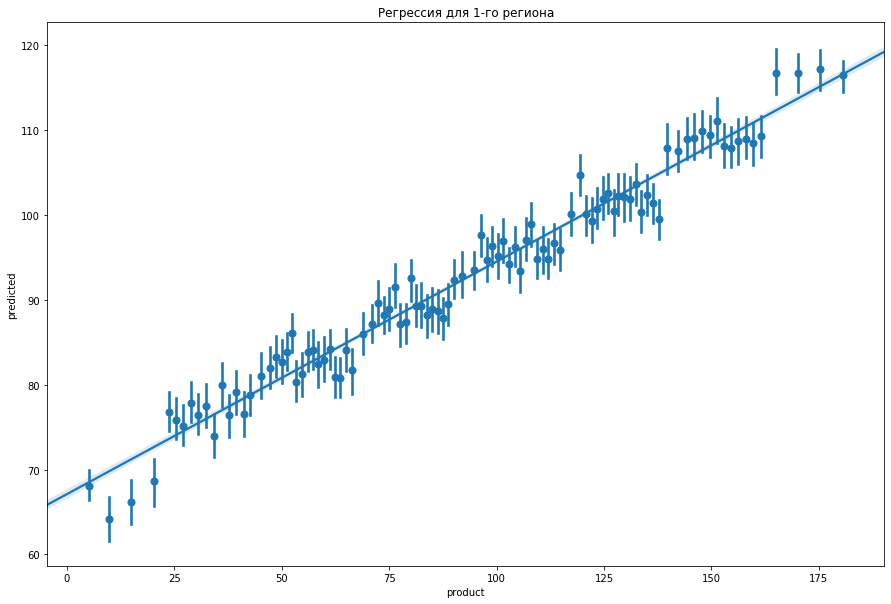

In [28]:
visualize(region_1_report, 'Регрессия для 1-го региона')

### Расчет метрик и среднего значения

In [29]:
mse_1 = mean_squared_error(y_test_1, y_predict_1 )
rmse_1 = mse_1 ** 0.5

mae_1 = mean_absolute_error(y_test_1, y_predict_1)

r2_1 = r2_score(y_test_1, y_predict_1 )

mean_1 = np.mean(region_1_report['predicted'])
mean_1_true = np.mean(region_1_report['product'])

print(f'Метрики для региона 1:\nКорень среднеквадратичной ошибки - \
{rmse_1:.2f}\nАбсолютная средняя ошибка  - {mae_1:.2f}\nR2-Score - {r2_1:.2f}\
\n\nСреднее значение для региона - {mean_1:.2f}, настоящее среднее - {mean_1_true:.2f}')


Метрики для региона 1:
Корень среднеквадратичной ошибки - 37.76
Абсолютная средняя ошибка  - 31.05
R2-Score - 0.27

Среднее значение для региона - 92.40, настоящее среднее - 92.33


In [30]:
scores.append(['region_1',  rmse_1, mae_1, r2_1, mean_1, mean_1_true])
scores

[['region_1',
  37.75660035026169,
  31.047681538788183,
  0.2728287328173471,
  92.3987999065777,
  92.32595637084387]]

Вывод по первому региону:

- Модель показала спорную эффективность в предсказании значении скважины – по сути она предсказывает аппроксимировала к среднему значению показатели по разным месторождениям. Отсюда логичный вывод, что у нас недостаток 

- Средний запас сырья предсказанный моделью - 92,4 тыс. баррелей

- Корень из среднеквадратической ошибки (RMSE) - 37,75 тыс. баррелей

- Абсолютная ошибка - 31 тыс. баррелей

Таким образом, мы получили достаточно широкий разброс значений относительно действительного для данного региона. Проделаем ту же операцию с остальными.

## Регион 2

In [151]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(\
                                geo_1.iloc[:,1:-1], geo_1['product'], test_size=0.25, random_state=42)

In [152]:
lin_2 = grid_search(lin, param_grid, 4, X_train_2, y_train_2)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    3.6s finished


In [153]:
y_predict_2 = lin_2.predict(X_test_2)

In [154]:
region_2_report = pd.DataFrame(y_test_2)
region_2_report['predicted'] = y_predict_2



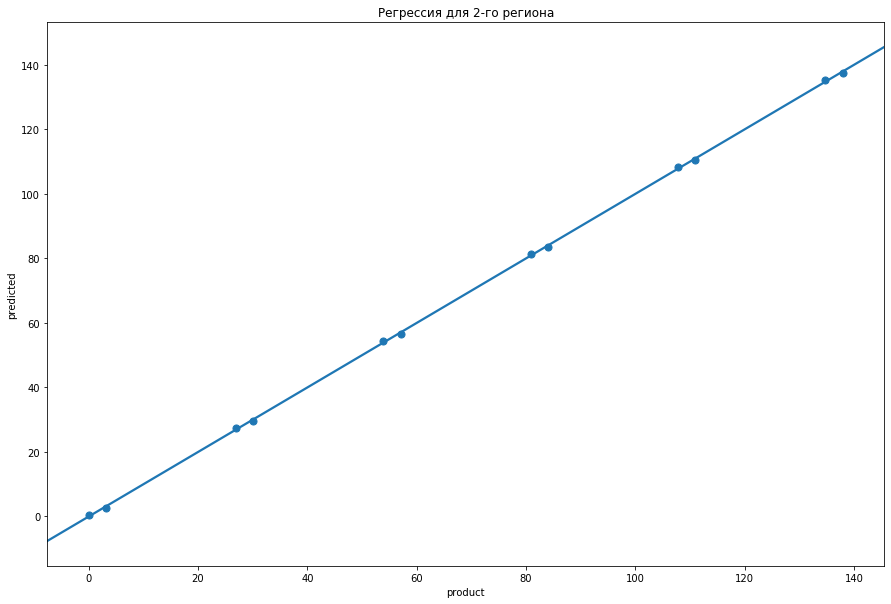

In [35]:
visualize(region_2_report, 'Регрессия для 2-го региона')

In [36]:
mse_2 = mean_squared_error(y_test_2, y_predict_2 )
rmse_2 = mse_2 ** 0.5

mae_2 = mean_absolute_error(y_test_2, y_predict_2)

r2_2 = r2_score(y_test_2, y_predict_2 )

mean_2 = np.mean(region_2_report['predicted'])
mean_2_true = np.mean(region_2_report['product'])

print(f'Метрики для региона 2:\nКорень среднеквадратичной ошибки - \
{rmse_2:.2f}\nАбсолютная средняя ошибка  - {mae_2:.2f}\nR2-Score - {r2_2:.2f}\
\n\nСреднее значение для региона - {mean_2:.2f}, настоящее среднее - {mean_2_true:.2f}')


Метрики для региона 2:
Корень среднеквадратичной ошибки - 0.89
Абсолютная средняя ошибка  - 0.72
R2-Score - 1.00

Среднее значение для региона - 68.71, настоящее среднее - 68.73


In [37]:
scores.append(['region_2',  rmse_2, mae_2, r2_2, mean_2, mean_2_true])

Вывод по второму региону:

- Модель показала спорную эффективность в предсказании значении скважины – по сути она предсказывает аппроксимировала к среднему значению показатели по разным месторождениям. Отсюда логичный вывод, что у нас недостаток 

- Средний запас сырья предсказанный моделью - 68.71 тыс. баррелей, реальный - 68.73

- Корень из среднеквадратической ошибки (RMSE) - 0.89 тыс. баррелей

- Абсолютная ошибка - 0.72 тыс. баррелей

- R2-Score - 1

Таким образом, мы получили очень хорошие оценки, следовательно низкая вариация объектом по целевому признаку в регионе или связь между факторными переменными и целевой – более явная. Перейдем к третьему региону

## Регион 3

In [38]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(\
                                geo_2.iloc[:,1:-1], geo_2['product'], test_size=0.25, random_state=42)

In [39]:
lin_3 = grid_search(lin, param_grid, 4, X_train_3, y_train_3)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    3.3s finished


In [40]:
y_predict_3 = lin_3.predict(X_test_3)

In [41]:
region_3_report = pd.DataFrame(y_test_3)
region_3_report['predicted'] = y_predict_3

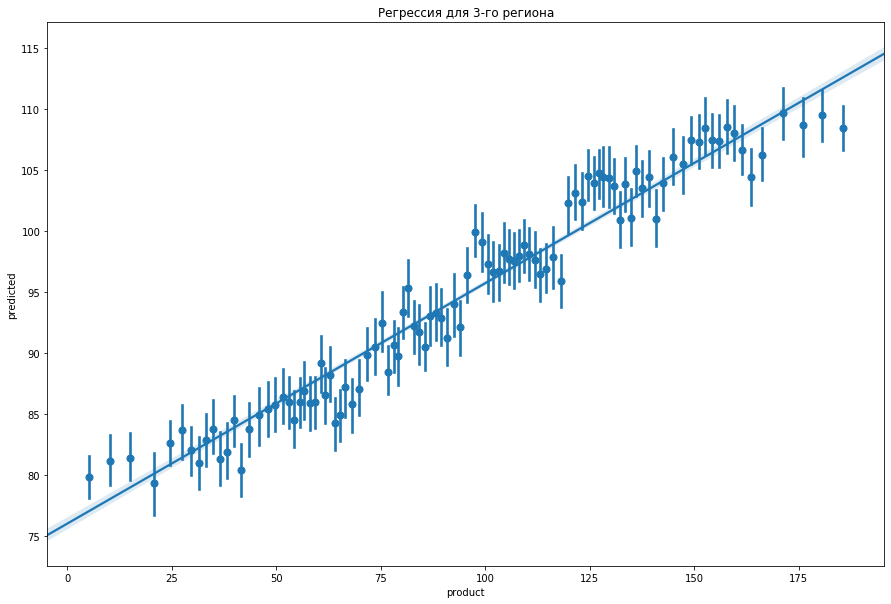

In [42]:
visualize(region_3_report, 'Регрессия для 3-го региона')

In [43]:
mse_3 = mean_squared_error(y_test_3, y_predict_3 )
rmse_3 = mse_3 ** 0.5

mae_3 = mean_absolute_error(y_test_3, y_predict_3)

r2_3 = r2_score(y_test_3, y_predict_3)

mean_3 = np.mean(region_3_report['predicted'])
mean_3_true = np.mean(region_3_report['product'])

print(f'Метрики для региона 3:\nКорень среднеквадратичной ошибки - \
{rmse_3:.2f}\nАбсолютная средняя ошибка  - {mae_3:.2f}\nR2-Score - {r2_3:.2f}\
\n\nСреднее значение для региона - {mean_3:.2f}, настоящее среднее - {mean_3_true:.2f}')


Метрики для региона 3:
Корень среднеквадратичной ошибки - 40.15
Абсолютная средняя ошибка  - 32.90
R2-Score - 0.20

Среднее значение для региона - 94.77, настоящее среднее - 95.15


In [44]:
scores.append(['region_3',  rmse_3, mae_3, r2_3, mean_3, mean_3_true])

Вывод по второму региону:

- Модель показала похожие результирующие показатели по сравнению с 1-ым регионом, нежели, чем со второым

- Средний запас сырья предсказанный моделью - 94.77 тыс. баррелей, реальный - 95.15

- Корень из среднеквадратической ошибки (RMSE) - 40,15 тыс. баррелей

- Абсолютная ошибка - 32.90 тыс. баррелей

- R2-Score - 0.2

**Таким образом, мы получили схожие результаты, как в первом регионе**

## Посмотрим на распределение ответов в каждом из регионов

### Регион 1

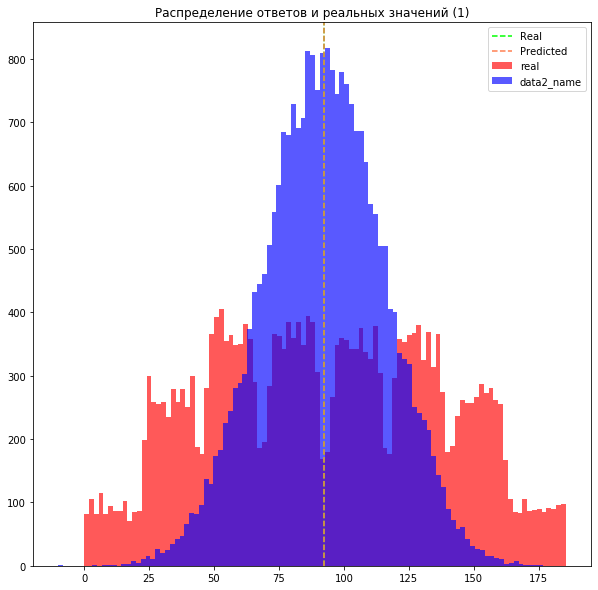

In [45]:
visualize_dist(region_1_report['product'],region_1_report['predicted'],'Распределение ответов и реальных значений (1)')

### Регион 2

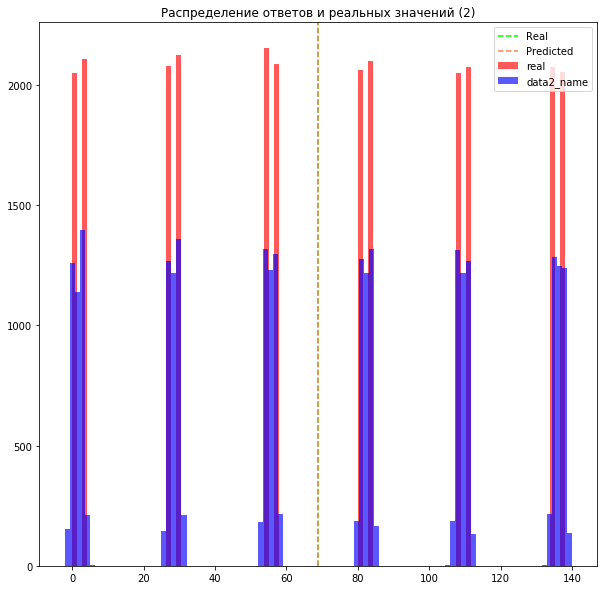

In [46]:
visualize_dist(region_2_report['product'],region_2_report['predicted'],'Распределение ответов и реальных значений (2)')

### Регион 3

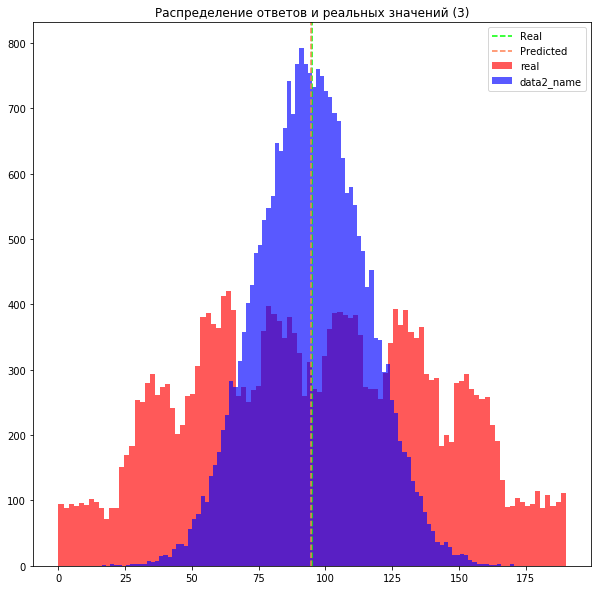

In [47]:
visualize_dist(region_3_report['product'],region_3_report['predicted'],'Распределение ответов и реальных значений (3)')

Таким образом, мы явном можем увидеть то, что
 
 - **в регионе 1 и 3 модель линейной регрессии "усреднила запасы", плотность её оценок гораздо выше, чем реальные значения запасов.**


 - **в регионе 2 - месторождения разбились на группы по параметрам, что заставляет задуматься о том, что факторные и целевая переменные были приведены к некоему усредненному значению и лишь затем переданы в работу.**

### Результаты работы модели в разных регионах

In [48]:
df_scores = pd.DataFrame(data = scores, columns =['region','RMSE', 'MAE', 'R2-Score', 'Predicted_mean', 'Real_mean'])


In [49]:
df_scores.style.highlight_max(color='lightblue', axis = 0)

,region,RMSE,MAE,R2-Score,Predicted_mean,Real_mean
0,region_1,37.7566,31.0477,0.272829,92.3988,92.326
1,region_2,0.89028,0.717012,0.999625,68.7129,68.7254
2,region_3,40.1459,32.897,0.196347,94.771,95.151


### Выводы по данной части:

1. В каждом регионе были построены модели с соответствующим RMSE (корень среднеквадратичной ошибки) :
    - Регион 1 - 37.7566
    - Регион 2 - 0.89028
    - Регион 3 - 40.1459


2. MAE (абсолютная ошибка):
    - Регион 1 - 31.05
    - Регион 2 - 0.71
    - Регион 3 - 32.89


3. R2-Score (коэффициент детерминации):
    - Регион 1 - 0.27
    - Регион 2 - 0.99
    - Регион 3 - 0.19
 
 
4. Среднее (тыс. баррелей)
    - Предсказанное среднее в 1-м регионе - 92.4, реальное - 92.3 
    - Предсказанное среднее в 2-м регионе - 68.7, реальное - 68.7
    - Предсказанное среднее в 3-м регионе - 94.7, реальное - 95.15
    
    
    
5. Основываясь на графическом представлении распределений реальных и предсказанных значений, мы можем заключить, что регион 1 и 2 были "усреднены" по показаниям запасов в связи с недостаточной полной признаков (распределение предсказаний намного более плотное, чем ответов). То есть, они были существенно аппроксимированы к среднему значению в регионе. В регионе 2 значения факторных и целевой переменной, скорее всего, были существенным образом стандартизированны (Предположим, что нам дали усредненные значения в группах)


6. Таким образом, на полученных данных модели оказались малопригодны. Для 1 и 3-го по предсказанием на условно "сырых" данных - необходимо нарастить количество признаков, чтобы добиться лучшего результата, для 2-го представить полные данные

# 3. Подготовка к расчёту прибыли

Сохраним ключевые значения констант для расчетов:

- Общий бюджет - 10 млрд. рублей

- Доход с единицы признака - 450 рублей * 10^3

- Исследуемые скважины - 500

- Отбор по 200 лучших

**Константа бюджета (рубли)**

In [135]:
budget = 10**10
budget

10000000000

**Константа дохода с единицы `product` (рубли/тыс.баррелей)**

In [136]:
revenue_per_well = 450000

revenue_per_well

450000

**Посчитаем минимально необходимое количество продукции на каждой скважине в разрабатываемом регионе:**

In [137]:
min_product_single = int(budget/(revenue_per_well*200))
min_product_sum = int(budget/(revenue_per_well))

print(f'На каждой скважине требуется как минимум {min_product_single}\
 тыс. баррелей\nДля окупаемости бюджета в регионе требуется освоить всего {min_product_sum} тыс.баррелей')

На каждой скважине требуется как минимум 111 тыс. баррелей
Для окупаемости бюджета в регионе требуется освоить всего 22222 тыс.баррелей


Получили, что для окупаемости бюджета в 10 млрд. рублей нужно, чтобы в среднем на скважинах было как минимум 111 тыс. баррелей запаса.

Таким образом, наша задача сводится к поиску такого региона, в котором наша модель наиболее удовлетворительно предсказывает запасы на скважине. 

Функция расчет прибыли должна по предсказаниям по шахте давать прогноз прибыли:

In [76]:
def profit_(data, col_1 ='product', col_2 = 'predicted'):
    
    wells = data.sort_values(by = col_2 , ascending=False)
    good_wells = wells.iloc[:200]
    total_revenue = np.sum(good_wells[col_1]) * revenue_per_well 
    profit = total_revenue - budget
    return profit

In [191]:
print(f'Максимальная прибыль первого региона - ', profit(region_1_report)\
      ,'\nМаксимальная прибыль второго региона - ',profit(region_2_report)\
     ,'\nМаксимальная прибыль третьего региона - ',profit(region_3_report))

TypeError: profit() missing 1 required positional argument: 'predictions'

Данные показатели иллюстрируют поведение в "тепличных" условиях, когда мы можем разведать все месторождения и без дополнительной процедуры поиска точного значения запасов.

**Алгоритм проверки регионов:**

1) Извлечь 500 наблюдений из тестовой выборки

2) Выбрать лучшие 200 по оценке модели

3) Сохранить результат прибыльности выборки

4) Повторить для 1000 выборок

5) Сохранить результат в массив

In [192]:
def bootstrap(data, size = 500, iterations = 1000):
    
    profit_results = []
    state = np.random.RandomState(42)
    
    for i in range(0, iterations):
        comp_sample = data.sample(size, replace = True, random_state = state)
        sample_profit = profit(comp_sample)
        
        profit_results.append(sample_profit)
        
    return profit_results

# 4. Расчёт прибыли и рисков 

In [79]:
import scipy.stats as st

revenue_report = []

In [80]:
def compute_risk(array):
    total = len(array)
    negative = 0
    for mean in array:
        if mean < 0:
            negative +=1
    
    return negative / total

### Регион 1

**Бустрапим:**

In [81]:
region_1_bootstrap = bootstrap(region_1_report)

In [82]:
region_1_profits = np.divide(region_1_bootstrap, 10**9)

**Вычисляем важные показатели:**

In [83]:
mean_reg1 = np.mean(region_1_profits)
median_reg1 = np.median(region_1_profits)
lower_reg1 = np.quantile(region_1_profits, .025)
conf_interval_reg1 = st.t.interval(0.95, len(region_1_profits)-1, 
                                    mean_reg1)
confidence_interval_1 = (np.quantile(region_1_profits, 0.025), np.quantile(region_1_profits, 0.975))
                         
risks_1 = compute_risk(region_1_profits)

**Визуализируем**

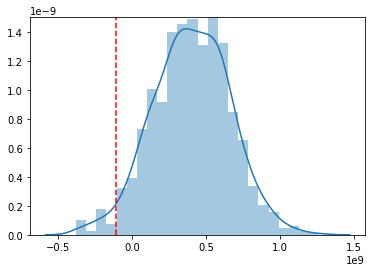

In [84]:
ax = sns.distplot(region_1_bootstrap)
ax.axvline(np.quantile(region_1_bootstrap, 0.025),linestyle = '--',color='r')

**Добавляем в отчет**

In [85]:
revenue_report.append(['region_1', mean_reg1,median_reg1,\
                       lower_reg1,conf_interval_reg1,\
                       confidence_interval_1,risks_1])

revenue_report

[['region_1',
  0.3995754780542297,
  0.40378087879384517,
  -0.11046789533197227,
  (-1.5627659830792189, 2.361916939187678),
  (-0.11046789533197227, 0.8974603277178793),
  0.06]]

### Регион 2

**Бутстрапим:**

In [86]:
region_2_bootstrap = bootstrap(region_2_report)

region_2_profits = np.divide(region_2_bootstrap, 10**9)

**Вычисляем важные показатели:**

In [87]:
mean_reg2 = np.mean(region_2_profits)
median_reg2 = np.median(region_2_profits)
lower_reg2 = np.quantile(region_2_profits, .025)
conf_interval_reg2 = st.t.interval(0.95, len(region_2_profits)-1, 
                                    mean_reg2)

confidence_interval_2 = (np.quantile(region_2_profits, 0.025), np.quantile(region_2_profits, 0.975))
                         
risks_2 = compute_risk(region_2_profits)

**Визуализируем**

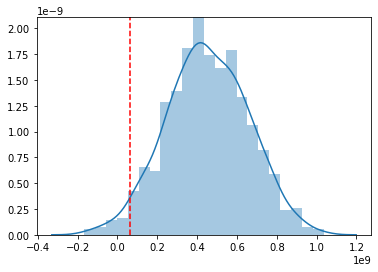

In [88]:
ax = sns.distplot(region_2_bootstrap)
ax.axvline(np.quantile(region_2_bootstrap, 0.025),linestyle = '--',color='r')

**Добавляем в отчет**

In [89]:
revenue_report.append(['region_2', mean_reg2,median_reg2,lower_reg2,conf_interval_reg2,confidence_interval_2,risks_2])

### Регион 3

**Бутстрапим**

In [90]:
region_3_bootstrap = bootstrap(region_3_report)

region_3_profits = np.divide(region_3_bootstrap, 10**9)

**Вычисляем важные показатели:**

In [91]:
mean_reg3 = np.mean(region_3_profits)
lower_reg3 = np.quantile(region_3_profits, .025)
median_reg3 = np.median(region_3_profits)
conf_interval_reg3 = st.t.interval(0.95, len(region_3_profits)-1, 
                                    mean_reg2)

#дополнение

confidence_interval_3 = (np.quantile(region_3_profits, 0.025), np.quantile(region_3_profits, 0.975))
                         
risks_3 = compute_risk(region_3_profits)

**Визуализируем**

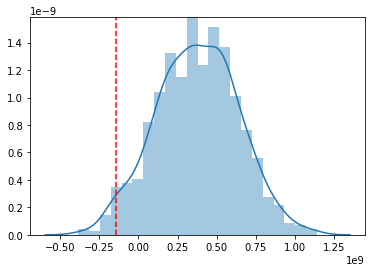

In [92]:
ax = sns.distplot(region_3_bootstrap)
ax.axvline(np.quantile(region_3_bootstrap, 0.025),linestyle = '--',color='r')

In [93]:
revenue_report.append(['region_3', mean_reg3,median_reg3,lower_reg3,conf_interval_reg3,confidence_interval_3,risks_3])

## Отчет о прибыльности и общий вывод

In [94]:
df_profits = pd.DataFrame(data = revenue_report, columns =['Регион','Среднее', \
                'Медиана','Граница в 2,5%', 'Доверительный интервал 95% - стат тест',\
                'Доверительный интервал 95% - Bootstrap', 'Риски, доля'])

df_profits.style.highlight_max(color='lightgreen', axis = 0)


,Регион,Среднее,Медиана,"Граница в 2,5%",Доверительный интервал 95% - стат тест,Доверительный интервал 95% - Bootstrap,"Риски, доля"
0,region_1,0.399575,0.403781,-0.110468,"(-1.5627659830792189, 2.361916939187678)","(-0.11046789533197227, 0.8974603277178793)",0.06
1,region_2,0.452049,0.448141,0.0616845,"(-1.5102925702269903, 2.414390352039907)","(0.061684479654226736, 0.8453401775073849)",0.015
2,region_3,0.37501,0.372647,-0.144767,"(-1.5102925702269903, 2.414390352039907)","(-0.14476672730489268, 0.8883904035342213)",0.08


# Новый вывод

**Исходя из представленных данных - наилучший регион для разработки: регион № 1, несмотря на то что лучшая средняя выручка и риски у региона № 2.**


Результаты в отношении региона № 2 детерменированы характером представленных данных, поэтому не могут приниматься в расчет до валидации у поставщика данных. (Неявная категоризация/стандартизация)


Принимая во внимание близость качества моделей, предсказавших запасы в регионе № 1 и 3: средняя выручка в регионе № 1 (0.40 млрд. рублей) больше выручки в регионе № 3 (0.38), равно как и 2.5%-квантиль (-0.11 млрд. рублей в первом реионе против -0.17 млрд. рублей в регионе № 3).


1. Средняя выручка по регионам:

    - регион № 1: 0.40 млрд. рублей,
    - регион № 2: 0.45 млрд. рублей,
    - регион № 3: 0.37 млрд. рублей.
    
    
2. Медиана (практически совпадает со средним):

    - регион № 1: 0.40 млрд. рублей,
    - регион № 2: 0.45 млрд. рублей,
    - регион № 3: 0.37 млрд. рублей.


3. Исследование показало, что исходя из представленных данных, риск убытков отсутвует, 2.5%-квантиль для регионов:

    - регион № 1: -0.11 млрд. рублей, верхний - 0.89 млрд. рублей
    - регион № 2: 0.06 млрд. рублей, верхний - 0.84 млрд. рублей
    - регион № 3: -0.14 млрд. рублей, верхний - 0.88 млрд. рублей
    
    
    
    
4. Всего лишь с 5% вероятностью мы можем утверждать, что наши результаты были получены случайно и реальные показатели оценок прибыли отличаются серьезно от полученных на модели. Если это истинно, то уход в убытки не должен превысить 1,5 млрд (для всех регионов)


5. Процент рисков отбора неудачных скважин:
    - регион № 1: 6%
    - регион № 2: 1.5%
    - регион № 3: 8%
    



Исходя из результатов исследования - следует принять во внимание, что модель малопригодна для настоящего прогнозирования данных, а значит требуется уточнение факторных фичей и апробация других моделей (например, регрессионного дерева) [хотя CatBoost показал себя примерно также(((]
